<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Developing a classification model for Twitter topics (Formula 1 vs MotoGP)

### Contents:
- [Preprocessing](#Preprocessing)

## Preprocessing

In this section, we will be preprocessing our data so that we can build our model with clean data. We will try to remove urls, stopwords, quotation marks, emoticons, and other content in the tweets that are either noise, or not useful for building our model.

We will also create new columns for hashtags, mentions, and text (which are tweets after removing hastags and mentions) to further breakdown the tweets to identify which features are useful for building our model.

After cleaning the tweets and texts, we will tokenize and lemmatize these two features to reduce each word to its base form. This will allow us to remove overlapping words and reduce the number of unique tokens to be used for our model.

We will then export the processed dataset for modeling.

Finally, we will explore the processed dataset to have a sense of the top words which appear most frequently.

In [1]:
# Import libraries
import pandas as pd       
import re
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from cleantext import clean

from wordcloud import WordCloud
import matplotlib.pyplot as plt

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [2]:
# Read in file
df = pd.read_csv("../data/train_data.csv")
df.head(15)

,date,content,username,like_count,retweet_count
0,2023-02-27 20:00:00+00:00,Tensions were running high between the Team Pr...,F1,22500,1638
1,2023-02-27 19:00:02+00:00,"Striking a pose, ft. a glorious mullet too ✨\n...",F1,3553,291
2,2023-02-27 18:02:00+00:00,💰🆕 FANTASY PRICE REVEAL 🆕💰\n\nCreate your ulti...,F1,1527,146
3,2023-02-27 17:55:00+00:00,It's almost time for F1 Fantasy to restart! 🤩\...,F1,1215,210
4,2023-02-27 17:37:05+00:00,We couldn't not put these two together! 🥰\n\n@...,F1,8125,785
5,2023-02-27 17:15:33+00:00,"Next up, we have the rookies 👊\n\nMcLaren's @O...",F1,5487,301
6,2023-02-27 16:56:12+00:00,My First Day: F1 2023 ✨\n\nFeaturing the @Scud...,F1,35761,2284
7,2023-02-27 16:10:00+00:00,"He took a year out of the sport, but still pro...",F1,4044,222
8,2023-02-27 14:05:40+00:00,F1 Fantasy is BACK and BIGGER than ever! 🕹️🤩\n...,F1,1717,165
9,2023-02-27 12:15:00+00:00,Three world champions 🏆\n\nThree mighty compet...,F1,22743,1257


### Remove newlines "/n"

In [3]:
df_content = df['content'].str.lower()
df_raw_tweet = []

for tweet in df_content:
    clean_tweet = tweet.replace('\n', ' ')
    df_raw_tweet.append(clean_tweet)

df_raw_tweet

['tensions were running high between the team principals at this group meeting 😅  drive to survive season 5, now streaming on @netflix 📺 ￼ #f1 #drivetosurvive5 https://t.co/tonx3pxana',
 'striking a pose, ft. a glorious mullet too ✨  we followed @valtteribottas for his pre-season media day shoot in our latest episode of all access! 📸  come behind the scenes with us, and watch all the fun we had with the finn 👇  #f1 @alfaromeof1',
 '💰🆕 fantasy price reveal 🆕💰  create your ultimate team ahead of our opening round in bahrain!  who are you picking? 👀  #f1 #f1fantasy',
 "it's almost time for f1 fantasy to restart! 🤩  here are our tips for how to get the most out of your #f1fantasy team for this year! 🙌  #f1   https://t.co/9d16p7pooo",
 "we couldn't not put these two together! 🥰  @pierregasly and good pal @yukitsunoda07 🙌  #f1 https://t.co/zzrym9kquc",
 "next up, we have the rookies 👊  mclaren's @oscarpiastri, william's @logansargeant and alpha tauri's @nyckdevries ✌️  #f1 https://t.co/74xjw

### Remove quotation marks

In [4]:
df_raw_tweet2 = []

for tweet in df_raw_tweet:
    tweet = tweet.replace('"', '')
    tweet = tweet.replace('\'', ' ')
    df_raw_tweet2.append(tweet)
    
df_raw_tweet2

['tensions were running high between the team principals at this group meeting 😅  drive to survive season 5, now streaming on @netflix 📺 ￼ #f1 #drivetosurvive5 https://t.co/tonx3pxana',
 'striking a pose, ft. a glorious mullet too ✨  we followed @valtteribottas for his pre-season media day shoot in our latest episode of all access! 📸  come behind the scenes with us, and watch all the fun we had with the finn 👇  #f1 @alfaromeof1',
 '💰🆕 fantasy price reveal 🆕💰  create your ultimate team ahead of our opening round in bahrain!  who are you picking? 👀  #f1 #f1fantasy',
 'it s almost time for f1 fantasy to restart! 🤩  here are our tips for how to get the most out of your #f1fantasy team for this year! 🙌  #f1   https://t.co/9d16p7pooo',
 'we couldn t not put these two together! 🥰  @pierregasly and good pal @yukitsunoda07 🙌  #f1 https://t.co/zzrym9kquc',
 'next up, we have the rookies 👊  mclaren s @oscarpiastri, william s @logansargeant and alpha tauri s @nyckdevries ✌️  #f1 https://t.co/74xjw

In [5]:
df_raw_tweet = df_raw_tweet2

### Create new column for hashtag

In [6]:
def extract_hashtags(tweet):
    # define regular expression pattern to match hashtags
    hashtag_pattern = re.compile(r'#\w+\s*')
    # find all hashtags in tweet using the pattern
    hashtags = hashtag_pattern.findall(tweet)
    # return list of hashtags without '#' symbol
    return [hashtag.strip('#') for hashtag in hashtags]

In [7]:
df_hashtag = []

for tweet in df_raw_tweet:
    hashtag = extract_hashtags(tweet)
    hashtag = ' '.join(hashtag)
    df_hashtag.append(hashtag)

In [8]:
df_hashtag

['f1  drivetosurvive5 ',
 'f1 ',
 'f1  f1fantasy',
 'f1fantasy  f1   ',
 'f1 ',
 'f1 ',
 'f1 ',
 'bahraingp  f1 ',
 'f1  f1fantasy',
 'f1 ',
 'f1 ',
 '',
 'spanishgp  f1 ',
 'bahraingp  f1 ',
 'bahraingp  f1 ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1fantasy  f1',
 'f1  f1testing ',
 'bahraingp  f1 ',
 'f1fantasy  f1',
 'f1  f1testing ',
 'f1  drivetosurvive5 ',
 'f1 ',
 'f1 ',
 'f1  f1fantasy',
 'f1  f1testing',
 'f1  f1testing ',
 'f1  f1testing  ',
 'f1  f1testing ',
 'f1  f1testing  ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing  ',
 'f1  f1testing ',
 'f1testing  f1 ',
 'f1  f1testing ',
 'f1  f1testing',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing ',
 'f1  f1testing   ',
 'f1\xa0 f1testing ',
 'f1  f1testing ',
 '',
 'f1  f1testing ',
 'f1  f1testing ',

### Create new column for mentions

In [9]:
# Define a function to extract mentions from tweets
def extract_mentions(tweet):
    # define regular expression pattern to match mentions
    mention_pattern = re.compile(r'@\w+\s*')
    # find all mentions in tweet using the pattern
    mentions = mention_pattern.findall(tweet)
    # return list of mentions without '@' symbol
    return [mention.strip('@') for mention in mentions]

In [10]:
df_mention = []

for tweet in df_raw_tweet:
    mention = extract_mentions(tweet)
    mention = ' '.join(mention)
    df_mention.append(mention)

In [11]:
df_mention

['netflix ',
 'valtteribottas  alfaromeof1',
 '',
 '',
 'pierregasly  yukitsunoda07 ',
 'oscarpiastri logansargeant  nyckdevries ',
 'scuderiaferrari  charles_leclerc  carlossainz55 ',
 'kevinmagnussen ',
 '',
 'alo_oficial lewishamilton  max33verstappen ',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'schecoperez  netflix ',
 '',
 'qatarairways ',
 '',
 '',
 '',
 '',
 'alphataurif1 ',
 '',
 'schecoperez  redbullracing ',
 'haasf1team ',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'mercedesamgf1 ',
 '',
 '',
 'mclarenf1 ',
 '',
 '',
 '',
 '',
 'aussiegrit ',
 'charles_leclerc  scuderiaferrari ',
 '',
 '',
 'haasf1team ',
 '',
 '',
 '',
 '',
 '',
 'georgerussell63 ',
 'netflix ',
 'landonorris  max33verstappen ',
 '',
 'qatarairways ',
 '',
 'alo_oficial  astonmartinf1 ',
 '',
 '',
 '',
 '',
 '',
 'alfaromeof1 ',
 '',
 '',
 'valtteribottas ',
 '',
 '',
 'netflix raye  biffyclyro  sigmahq  youmeatsix  spotify ',
 '',
 '',
 'mclare

### Remove emoticons from tweets

In [12]:
df_tweet_remove_emo = []

for tweet in df_raw_tweet:
    filtered_tweet = clean(tweet, no_emoji=True)
    df_tweet_remove_emo.append(filtered_tweet)

In [13]:
df_tweet_remove_emo

['tensions were running high between the team principals at this group meeting drive to survive season 5, now streaming on @netflix #f1 #drivetosurvive5 https://t.co/tonx3pxana',
 'striking a pose, ft. a glorious mullet too we followed @valtteribottas for his pre-season media day shoot in our latest episode of all access! come behind the scenes with us, and watch all the fun we had with the finn #f1 @alfaromeof1',
 'fantasy price reveal create your ultimate team ahead of our opening round in bahrain! who are you picking? #f1 #f1fantasy',
 'it s almost time for f1 fantasy to restart! here are our tips for how to get the most out of your #f1fantasy team for this year! #f1 https://t.co/9d16p7pooo',
 'we couldn t not put these two together! @pierregasly and good pal @yukitsunoda07 #f1 https://t.co/zzrym9kquc',
 'next up, we have the rookies mclaren s @oscarpiastri, william s @logansargeant and alpha tauri s @nyckdevries #f1 https://t.co/74xjwhdwc3',
 'my first day: f1 2023 featuring the @s

### Remove urls from tweets

In [14]:
# Define a function to remove URLs from tweets
def remove_urls(tweet):
    # define regular expression pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # replace URLs with empty string
    tweet_without_urls = url_pattern.sub('', tweet)
    return tweet_without_urls

In [15]:
df_tweet_remove_url = []

for tweet in df_tweet_remove_emo:
    tweet_no_url = remove_urls(tweet)
    df_tweet_remove_url.append(tweet_no_url)

In [16]:
df_tweet_remove_url

['tensions were running high between the team principals at this group meeting drive to survive season 5, now streaming on @netflix #f1 #drivetosurvive5 ',
 'striking a pose, ft. a glorious mullet too we followed @valtteribottas for his pre-season media day shoot in our latest episode of all access! come behind the scenes with us, and watch all the fun we had with the finn #f1 @alfaromeof1',
 'fantasy price reveal create your ultimate team ahead of our opening round in bahrain! who are you picking? #f1 #f1fantasy',
 'it s almost time for f1 fantasy to restart! here are our tips for how to get the most out of your #f1fantasy team for this year! #f1 ',
 'we couldn t not put these two together! @pierregasly and good pal @yukitsunoda07 #f1 ',
 'next up, we have the rookies mclaren s @oscarpiastri, william s @logansargeant and alpha tauri s @nyckdevries #f1 ',
 'my first day: f1 2023 featuring the @scuderiaferrari boys, @charles_leclerc and @carlossainz55 to kick us off! #f1 ',
 'he took a 

### Remove stop words from tweets

In [17]:
def remove_stop_words(tweet):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(tweet)
    filtered_words = [word for word in words if word.casefold() not in stop_words]
    return " ".join(filtered_words)

In [18]:
df_tweet_remove_stop = []

for tweet in df_tweet_remove_url:
    tweet_remove_stop = remove_stop_words(tweet)
    df_tweet_remove_stop.append(tweet_remove_stop)

In [19]:
df_tweet_remove_stop

['tensions running high team principals group meeting drive survive season 5 , streaming @ netflix # f1 # drivetosurvive5',
 'striking pose , ft. glorious mullet followed @ valtteribottas pre-season media day shoot latest episode access ! come behind scenes us , watch fun finn # f1 @ alfaromeof1',
 'fantasy price reveal create ultimate team ahead opening round bahrain ! picking ? # f1 # f1fantasy',
 'almost time f1 fantasy restart ! tips get # f1fantasy team year ! # f1',
 'put two together ! @ pierregasly good pal @ yukitsunoda07 # f1',
 'next , rookies mclaren @ oscarpiastri , william @ logansargeant alpha tauri @ nyckdevries # f1',
 'first day : f1 2023 featuring @ scuderiaferrari boys , @ charles_leclerc @ carlossainz55 kick us ! # f1',
 'took year sport , still produced one all-time greatest drives absolute magic @ kevinmagnussen 2022 # bahraingp # f1',
 'f1 fantasy back bigger ever ! create team ! # f1 # f1fantasy',
 'three world champions three mighty competitors wait see @ alo_

### Lemmatize tweets

In [20]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize tweets
def lemmatize_tweet(tweet):
    words = word_tokenize(tweet)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

In [21]:
df_tweet_lemmatized = []

for tweet in df_tweet_remove_stop:
    lemmatized_tweet = lemmatize_tweet(tweet)
    df_tweet_lemmatized.append(lemmatized_tweet)

In [22]:
df_tweet_lemmatized

['tension running high team principal group meeting drive survive season 5 , streaming @ netflix # f1 # drivetosurvive5',
 'striking pose , ft. glorious mullet followed @ valtteribottas pre-season medium day shoot latest episode access ! come behind scene u , watch fun finn # f1 @ alfaromeof1',
 'fantasy price reveal create ultimate team ahead opening round bahrain ! picking ? # f1 # f1fantasy',
 'almost time f1 fantasy restart ! tip get # f1fantasy team year ! # f1',
 'put two together ! @ pierregasly good pal @ yukitsunoda07 # f1',
 'next , rookie mclaren @ oscarpiastri , william @ logansargeant alpha tauri @ nyckdevries # f1',
 'first day : f1 2023 featuring @ scuderiaferrari boy , @ charles_leclerc @ carlossainz55 kick u ! # f1',
 'took year sport , still produced one all-time greatest drive absolute magic @ kevinmagnussen 2022 # bahraingp # f1',
 'f1 fantasy back bigger ever ! create team ! # f1 # f1fantasy',
 'three world champion three mighty competitor wait see @ alo_oficial , 

### Create another column of tweets excluding hashtags/mentions

In [23]:
#remove hashtag/mention from df_tweet_remove_url
df_text = []

for tweet in df_tweet_remove_url:
    clean_tweet = re.sub(r'#\w+', '', tweet)
    clean_tweet2 = re.sub(r'@\w+', '', clean_tweet)
    df_text.append(clean_tweet2)
    
df_text

['tensions were running high between the team principals at this group meeting drive to survive season 5, now streaming on    ',
 'striking a pose, ft. a glorious mullet too we followed  for his pre-season media day shoot in our latest episode of all access! come behind the scenes with us, and watch all the fun we had with the finn  ',
 'fantasy price reveal create your ultimate team ahead of our opening round in bahrain! who are you picking?  ',
 'it s almost time for f1 fantasy to restart! here are our tips for how to get the most out of your  team for this year!  ',
 'we couldn t not put these two together!  and good pal   ',
 'next up, we have the rookies mclaren s , william s  and alpha tauri s   ',
 'my first day: f1 2023 featuring the  boys,  and  to kick us off!  ',
 'he took a year out of the sport, but still produced one of his all-time greatest drives absolute magic from  in 2022   ',
 'f1 fantasy is back and bigger than ever! create your team here!  ',
 'three world champio

In [24]:
# remove stop words
df_text_remove_stop = []

for text in df_text:
    text_remove_stop = remove_stop_words(text)
    df_text_remove_stop.append(text_remove_stop)

df_text_remove_stop

['tensions running high team principals group meeting drive survive season 5 , streaming',
 'striking pose , ft. glorious mullet followed pre-season media day shoot latest episode access ! come behind scenes us , watch fun finn',
 'fantasy price reveal create ultimate team ahead opening round bahrain ! picking ?',
 'almost time f1 fantasy restart ! tips get team year !',
 'put two together ! good pal',
 'next , rookies mclaren , william alpha tauri',
 'first day : f1 2023 featuring boys , kick us !',
 'took year sport , still produced one all-time greatest drives absolute magic 2022',
 'f1 fantasy back bigger ever ! create team !',
 'three world champions three mighty competitors wait see , achieve season !',
 'first time since 2006 , going flat-out final chicane spain season !',
 '',
 'breaking : changing track configuration final chicane removed , leaving circuit original last two corner layout !',
 'first bout truly legendary title duel max lewis put incredible show desert back 2021

In [25]:
# lemmatize
df_text_lemmatized = []

for text in df_text_remove_stop:
    lemmatized_text = lemmatize_tweet(text)
    df_text_lemmatized.append(lemmatized_text)
    
df_text_lemmatized

['tension running high team principal group meeting drive survive season 5 , streaming',
 'striking pose , ft. glorious mullet followed pre-season medium day shoot latest episode access ! come behind scene u , watch fun finn',
 'fantasy price reveal create ultimate team ahead opening round bahrain ! picking ?',
 'almost time f1 fantasy restart ! tip get team year !',
 'put two together ! good pal',
 'next , rookie mclaren , william alpha tauri',
 'first day : f1 2023 featuring boy , kick u !',
 'took year sport , still produced one all-time greatest drive absolute magic 2022',
 'f1 fantasy back bigger ever ! create team !',
 'three world champion three mighty competitor wait see , achieve season !',
 'first time since 2006 , going flat-out final chicane spain season !',
 '',
 'breaking : changing track configuration final chicane removed , leaving circuit original last two corner layout !',
 'first bout truly legendary title duel max lewis put incredible show desert back 2021 ! ready a

### Create new dataframe of processed columns

In [26]:
df_cleaned = pd.DataFrame({'tweet': df_tweet_lemmatized, 
                           'text': df_text_lemmatized,
                           'hashtag': df_hashtag, 
                           'mention': df_mention, 
                           'username': df['username'],
                          'like_count': df['like_count'],
                          'retweet_count': df['retweet_count'],
                           'tweet_length': df['content'].map(len),
                           'tweet_word_count': df['content'].map(lambda x: len(x.split()))})
df_cleaned

,tweet,text,hashtag,mention,username,like_count,retweet_count,tweet_length,tweet_word_count
0,tension running high team principal group meet...,tension running high team principal group meet...,f1 drivetosurvive5,netflix,F1,22500,1638,181,27
1,"striking pose , ft. glorious mullet followed @...","striking pose , ft. glorious mullet followed p...",f1,valtteribottas alfaromeof1,F1,3553,291,243,45
2,fantasy price reveal create ultimate team ahea...,fantasy price reveal create ultimate team ahea...,f1 f1fantasy,,F1,1527,146,132,23
3,almost time f1 fantasy restart ! tip get # f1f...,almost time f1 fantasy restart ! tip get team ...,f1fantasy f1,,F1,1215,210,164,30
4,put two together ! @ pierregasly good pal @ yu...,put two together ! good pal,f1,pierregasly yukitsunoda07,F1,8125,785,114,16
...,...,...,...,...,...,...,...,...,...
19845,@ jazzycat62 @ valeyellow46,,,jazzycat62 valeyellow46,MotoGP,7,2,51,4
19846,man defined 2 decade # motogp shaping current ...,man defined 2 decade shaping current future ge...,motogp grazievale,valeyellow46,MotoGP,3283,570,226,32
19847,chapter 9 - hero made one half 2021 season @ f...,chapter 9 - hero made one half 2021 season far...,dutchgp,fabioq20,MotoGP,438,52,180,32
19848,"maybe one day many think day could come 2022 ,...","maybe one day many think day could come 2022 , !",motogp,peccobagnaia,MotoGP,433,25,123,19


In [27]:
# Proportion of tweets with no hashtag
(df_cleaned['hashtag'].isna().sum() + (df_cleaned['hashtag'] == '').sum())/19848

0.02997783151954857

In [28]:
# Proportion of tweets with no mention
(df_cleaned['mention'].isna().sum() + (df_cleaned['mention'] == '').sum())/19848

0.46725110842402257

In [29]:
# Export processed dataset to csv
df_cleaned.to_csv("../data/train_data_cleaned.csv", index = False)

### Top words in Tweets

In [30]:
cv = CountVectorizer(stop_words='english', min_df = 3)
cv.fit(df_cleaned['tweet'])

tweet_cv = cv.transform(df_cleaned['tweet'])
tweet_df = pd.DataFrame(tweet_cv.todense(), columns=cv.get_feature_names())

tweet_df.sum().sort_values(ascending=False).head(15)

/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


f1         7828
motogp     3569
race       2203
lap        2085
time       1715
rider      1466
moto2      1324
moto3      1192
day        1140
season      986
weekend     969
2022        948
new         920
year        895
track       859
dtype: int64

In [31]:
# Top words for F1
tweet_df = pd.concat([tweet_df, df_cleaned['username']], axis=1)

tweet_df[tweet_df['username'] == 'F1'].drop(columns='username').sum().sort_values(ascending=False).head(15)

f1            7811
lap            909
race           868
driver         595
verstappen     586
leclerc        516
2022           503
season         495
time           476
car            469
team           417
max            407
track          392
hamilton       351
sainz          340
dtype: int64

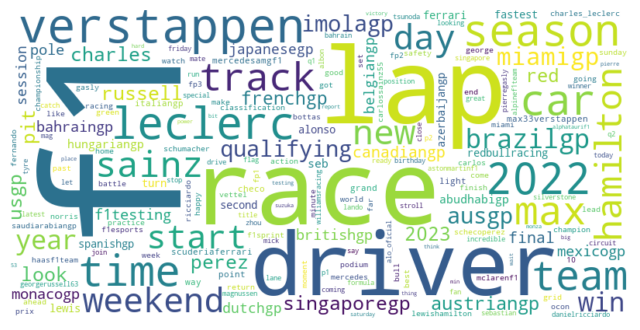

In [32]:
# Create word cloud for F1 tweets
wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(tweet_df[tweet_df['username'] == 'F1'].drop(columns='username').sum())

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
# Top words for MotoGP
tweet_df[tweet_df['username'] == 'MotoGP'].drop(columns='username').sum().sort_values(ascending=False).head(15)

motogp           3563
rider            1463
race             1335
moto2            1324
time             1239
moto3            1192
lap              1176
day               812
fabioq20          748
world             738
peccobagnaia      731
weekend           653
new               597
year              591
marcmarquez93     589
dtype: int64

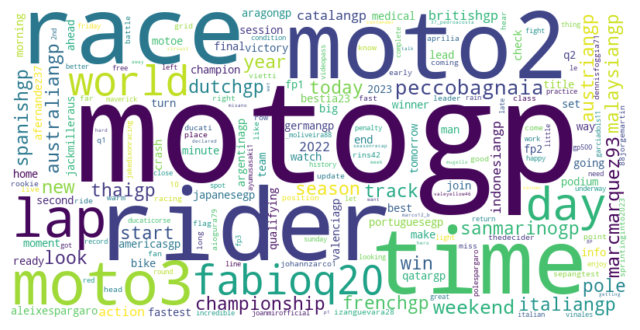

In [34]:
# Create word cloud for F1 tweets
wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(tweet_df[tweet_df['username'] == 'MotoGP'].drop(columns='username').sum())

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Top hashtags

In [35]:
cv = CountVectorizer(stop_words='english')
cv.fit(df_cleaned['hashtag'])

hashtag_cv = cv.transform(df_cleaned['hashtag'])
hashtag_df = pd.DataFrame(hashtag_cv.todense(), columns=cv.get_feature_names())

hashtag_df.sum().sort_values(ascending=False).head(15)

/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


f1              7306
motogp          3463
moto2           1312
moto3           1183
austriangp       774
frenchgp         764
dutchgp          739
italiangp        715
britishgp        714
spanishgp        693
japanesegp       672
australiangp     526
sanmarinogp      522
malaysiangp      515
thaigp           480
dtype: int64

In [36]:
# Top hashtags for F1
hashtag_df = pd.concat([hashtag_df, df_cleaned['username']], axis=1)

hashtag_df[hashtag_df['username'] == 'F1'].drop(columns='username').sum().sort_values(ascending=False).head(15)

f1             7306
brazilgp        304
miamigp         301
imolagp         291
ausgp           289
singaporegp     287
usgp            266
austriangp      264
frenchgp        258
canadiangp      256
f1testing       254
britishgp       254
monacogp        245
bahraingp       239
japanesegp      237
dtype: int64

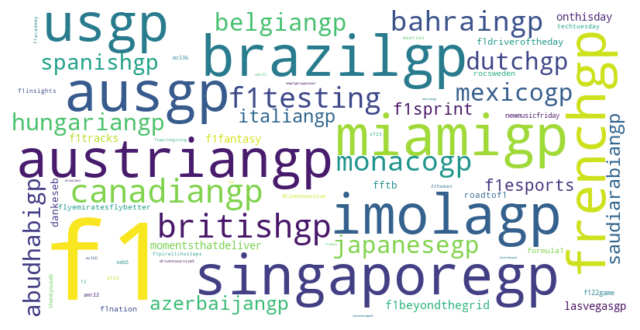

In [37]:
# Create word cloud for F1 hashtags
wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(hashtag_df[hashtag_df['username'] == 'F1'].drop(columns='username').sum())

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
# Top hashtag for MotoGP
hashtag_df[hashtag_df['username'] == 'MotoGP'].drop(columns='username').sum().sort_values(ascending=False).head(15)

motogp          3461
moto2           1312
moto3           1183
australiangp     524
italiangp        524
sanmarinogp      522
malaysiangp      515
austriangp       510
frenchgp         506
dutchgp          505
thaigp           480
spanishgp        477
catalangp        466
britishgp        460
indonesiangp     445
dtype: int64

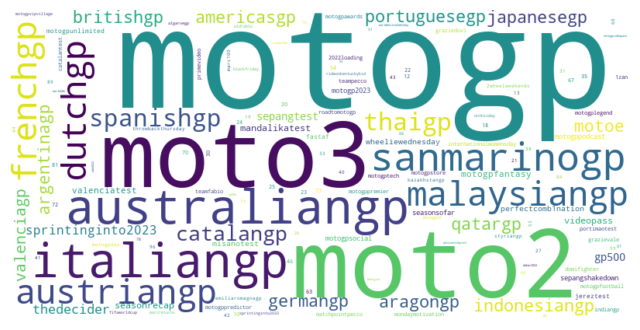

In [39]:
# Create word cloud for MotoGP hastags
wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(hashtag_df[hashtag_df['username'] == 'MotoGP'].drop(columns='username').sum())

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Top mentions

In [40]:
cv = CountVectorizer(stop_words='english')
cv.fit(df_cleaned['mention'])

mention_cv = cv.transform(df_cleaned['mention'])
mention_df = pd.DataFrame(mention_cv.todense(), columns=cv.get_feature_names())

mention_df.sum().sort_values(ascending=False).head(15)

/opt/homebrew/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


fabioq20           749
peccobagnaia       733
marcmarquez93      587
aleixespargaro     439
jackmilleraus      385
bestia23           330
afernandez37       292
izanguevara28      252
88jorgemartin      244
dennisfoggia71     226
redbullracing      221
rins42             219
mercedesamgf1      206
aiogura79          204
max33verstappen    200
dtype: int64

In [41]:
# Top mentions for F1 
mention_df = pd.concat([mention_df, df_cleaned['username']], axis=1)

mention_df[mention_df['username'] == 'F1'].drop(columns='username').sum().sort_values(ascending=False).head(15)

redbullracing      221
mercedesamgf1      206
max33verstappen    192
scuderiaferrari    192
charles_leclerc    183
mclarenf1          134
lewishamilton      122
schecoperez        116
haasf1team         114
carlossainz55      109
georgerussell63    106
danielricciardo    104
alpinef1team       103
astonmartinf1       96
williamsracing      92
dtype: int64

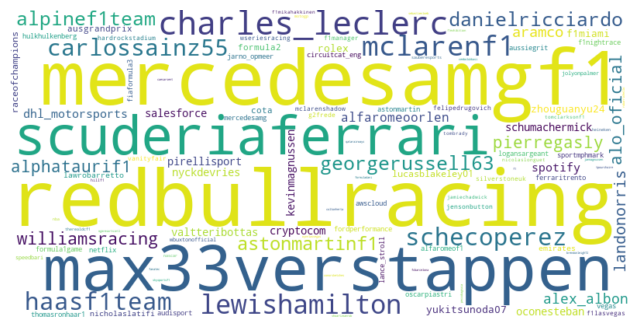

In [42]:
# Create word cloud for F1 mentions
wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(mention_df[mention_df['username'] == 'F1'].drop(columns='username').sum())

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [43]:
# Top mentions for MotoGP
mention_df[mention_df['username'] == 'MotoGP'].drop(columns='username').sum().sort_values(ascending=False).head(15)

fabioq20           747
peccobagnaia       730
marcmarquez93      587
aleixespargaro     439
jackmilleraus      385
bestia23           330
afernandez37       292
izanguevara28      252
88jorgemartin      244
dennisfoggia71     226
rins42             219
aiogura79          204
johannzarco1       181
joanmirofficial    168
jakedixonracing    167
dtype: int64

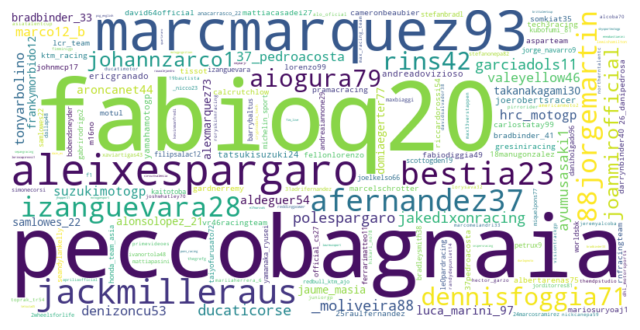

In [44]:
# Create word cloud for MotoGP mentions
wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(mention_df[mention_df['username'] == 'MotoGP'].drop(columns='username').sum())

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Things to note:
1. The top words that most frequently appear in F1 tweets seem different from those that appear in MotoGP tweets.
2. The top hashtags are very different for F1 and MotoGP tweets.
3. 97% of tweets in dataset contains hashtag, so hashtag is potentially a strong feature.
4. The top mentions are very different for F1 and MotoGP tweets.
5. 53% of tweets in dataset contains mention, so mention may not be a good feature to consider as almost half of dataset does not contain mention.